<a href="https://colab.research.google.com/github/Aarthykannan/ak/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
sin_img = x_train[0]

In [7]:
sin_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

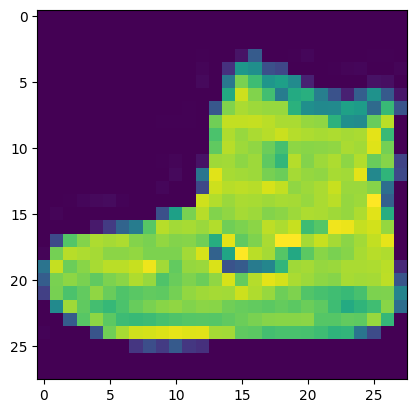

In [8]:
plt.imshow(sin_img)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_eg = to_categorical(y_train)
y_eg[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test)

In [9]:
x_train.max()

255

In [10]:
# scaling

x_train = x_train/255
x_test = x_test/255

In [11]:
# reshape the data

x_train.shape

(60000, 28, 28)

In [29]:
x_test.shape

(10000, 28, 28, 1)

In [12]:

# batch size, wt,ht, color channel
x_train = x_train.reshape(60000,28,28,1)

In [13]:
x_test = x_test.reshape(10000,28,28,1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten

In [30]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4),input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [27]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 1)

In [33]:
model.fit(x_train,y_eg,epochs =5,validation_data =(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/5
1875/1875 [==============================] - 28s 14ms/step - loss: 0.3942 - accuracy: 0.8603 - val_loss: 0.3311 - val_accuracy: 0.8797
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2746 - accuracy: 0.8996 - val_loss: 0.2788 - val_accuracy: 0.9019
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2283 - accuracy: 0.9165 - val_loss: 0.2844 - val_accuracy: 0.8951


In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

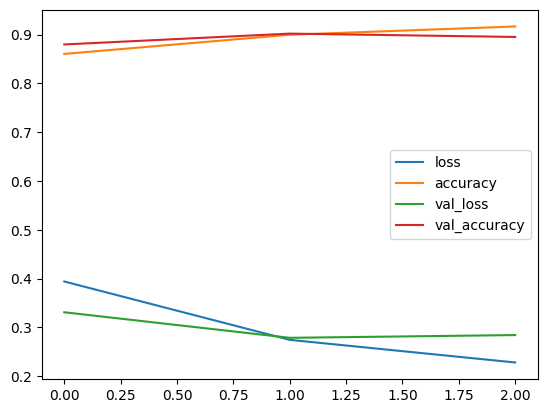

In [36]:
metrics.plot()

<Axes: >

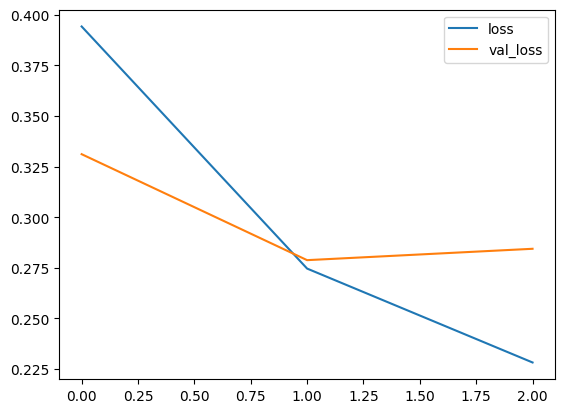

In [38]:
metrics[['loss','val_loss']].plot()

<Axes: >

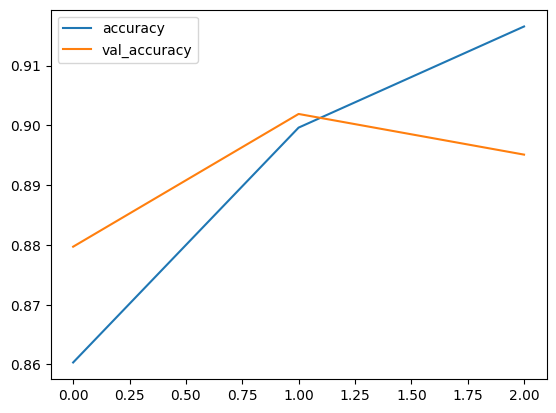

In [39]:
metrics[['accuracy','val_accuracy']].plot()

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
pred = np.argmax(model.predict(x_test),axis=-1)

313/313 [==============================] - 3s 8ms/step


In [48]:
pred

array([9, 2, 1, ..., 8, 1, 5])

In [49]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [50]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1118
           1       0.99      0.98      0.98      1008
           2       0.92      0.72      0.81      1270
           3       0.90      0.92      0.91       978
           4       0.79      0.86      0.82       922
           5       0.97      0.98      0.98       987
           6       0.58      0.83      0.69       708
           7       0.99      0.92      0.95      1078
           8       0.97      0.99      0.98       986
           9       0.93      0.99      0.96       945

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.91      0.90      0.90     10000



In [52]:
print(confusion_matrix(pred,y_test))

[[903   1  14  17   1   0 178   0   3   1]
 [  2 986   2  12   1   0   2   0   3   0]
 [ 39   1 919  25 136   0 145   0   5   0]
 [ 11   7   5 904  25   0  25   0   1   0]
 [  4   4  38  26 789   0  58   0   3   0]
 [  1   0   0   0   0 972   0   4   4   6]
 [ 35   1  22  15  48   0 585   0   2   0]
 [  1   0   0   0   0  22   0 988   5  62]
 [  4   0   0   1   0   0   7   0 974   0]
 [  0   0   0   0   0   6   0   8   0 931]]
